In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib widget
import sys
sys.path.append('../')  # make modules in main folder importable here

In [30]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# local imports from codes folder
from data_loader import load_variable, get_triangulation
from plotting import plot_2d_field_triangular_tri

In [28]:
results_path_dbgyre = '/gxfs_work/geomar/smomw649/results/dbgyre_topo_restart/'
results_path_souff = '/gxfs_work/geomar/smomw649/results/souff_lvl3/souff_20_001_005_40_25/'

mesh_path_dbgyre = '/gxfs_work/geomar/smomw649/meshes/dbgyre_20_shelf/' # path to folder containing .out files for the mesh
mesh_path_souff = '/gxfs_work/geomar/smomw649/meshes/souff_20/'

In [7]:
tri_souff = get_triangulation(mesh_path_souff, soufflet=True)
tri_dbgyre = get_triangulation(mesh_path_dbgyre, soufflet=False)

In [24]:
sst_souff = load_variable(results_path_souff, 'sst', year_1=1904)
u_dbgyre = load_variable(results_path_dbgyre, 'u', year_1=1960, year_f=1961)
v_dbgyre = load_variable(results_path_dbgyre, 'v', year_1=1960, year_f=1961)

In [26]:
sst_plot = sst_souff.isel(time=-1)
surf_u = u_dbgyre.isel(time=-1, nz1=0)
surf_v = v_dbgyre.isel(time=-1, nz1=0)
surf_speed = np.sqrt(surf_u**2 + surf_v**2)

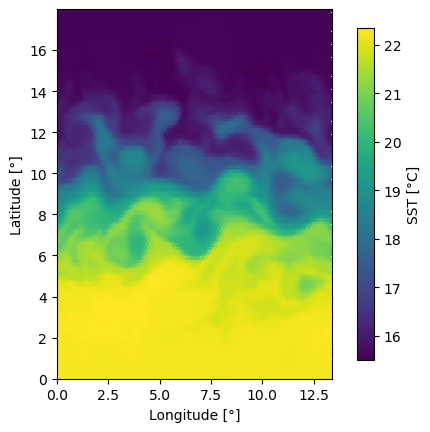

In [21]:
fig, ax = plot_2d_field_triangular_tri(sst_plot,
                                       tri_souff,
                                       shading='flat', #shading='flat' interpolates node values into elems. gouraud 
                                       cbar_label='SST [\N{degree sign}C]') 
plt.show()

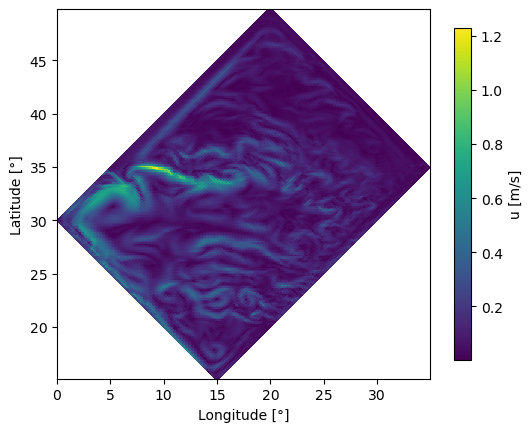

In [27]:
fig, ax = plot_2d_field_triangular_tri(surf_speed,
                                       tri_dbgyre,
                                       cbar_label='u [m/s]') 
plt.show()

## Old alternative strategy
The one above uses a matplotlib triangulation defining the grid, and it understands if we are plotting a variable on nodes or elements. Here we simply import the coordinates of the elements and nodes and plot directly on them.

In [31]:
from plotting import plot_2d_field_triangular
from data_loader import get_mesh_coordinates

In [29]:
lon_nodes, lat_nodes, lon_elems, lat_elems = get_mesh_coordinates(mesh_path_dbgyre)

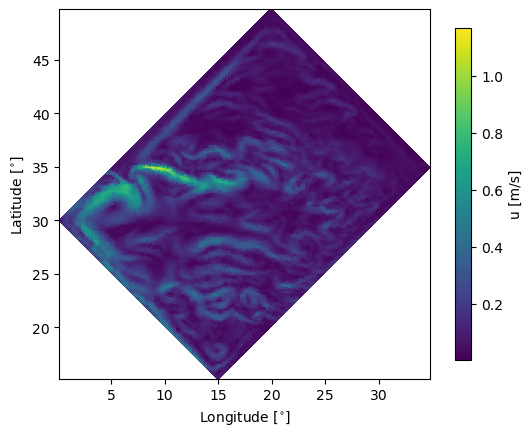

In [34]:
fig, ax = plot_2d_field_triangular(surf_speed, lon_elems, lat_elems, cbar_label='u [m/s]')